<a href="https://colab.research.google.com/github/adriansanchezroy/SecWebsite/blob/main/6_AJAX_Fetch_et_Javascript_asynchrone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration
------------
Les cellules de cette section installent l'extension qui customise les cellules JavaScript et HTML. Si vous êtes déconnecté de l'engin d'exécution par Google Colab, il vous faudra exécuter cette section de nouveau.

In [1]:
!pip3 install classroom-extensions
%load_ext classroom_extensions.web
%load_ext classroom_extensions.plantuml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00


# AJAX
-----

<img src="https://www.ajax.com/content/dam/cp-sites/home-care/ajax/en_us/img/010819-AJAX-DISH-RENDERS_52oz-Lime_400x400.png" align="left" width="200px">

* AJAX (*Asynchronous JavaScript and XML*) est une approche de développement web qui permet aux applications de communiquer avec le serveur en arrière-plan, sans nécessiter de rechargement complet de la page.

* Cette technologie repose sur l'utilisation combinée de JavaScript et de diverses technologies, telles que XML, JSON et HTML, pour effectuer des requêtes asynchrones vers le serveur et mettre à jour dynamiquement le contenu de la page sans perturber l'expérience utilisateur.

* Grâce à AJAX, les utilisateurs peuvent interagir avec les applications web de manière fluide et réactive. Par exemple, lorsqu'un utilisateur remplit un formulaire, AJAX peut être utilisé pour envoyer les données au serveur, traiter les informations et afficher une réponse sans recharger entièrement la page.

* Les technologies modernes ont évolué au-delà de l'utilisation stricte de XML et ont adopté des formats de données plus légers.

* [XMLHttpRequest](https://developer.mozilla.org/fr/docs/Web/API/XMLHttpRequest) est progressivement remplacé par des fonctions dans les cadriciels JavaScript et l'API standard officielle [Fetch API](https://developer.mozilla.org/fr/docs/Web/API/Fetch_API).


## Historique d'AJAX

* AJAX a été initialement introduit par Microsoft à travers le client Outlook Web Access (OWA) en 1998. Cependant, sa popularité s'est véritablement accrue grâce à Google qui l'a adopté dans des produits emblématiques tels que Gmail et Google Maps entre 2004 et 2005.

* Le terme AJAX a été officiellement proposé en 2005 dans un article, pour être ensuite intégré aux standards du W3C en 2006.

* Cette technologie est désormais supportée par la quasi-totalité des navigateurs depuis plusieurs années, permettant aux développeurs de créer des applications web interactives et dynamiques avec des échanges de données en temps réel entre le navigateur et le serveur.

## Comment fonctionne AJAX

* La figure ci-dessous illustre comment AJAX fonctionne.

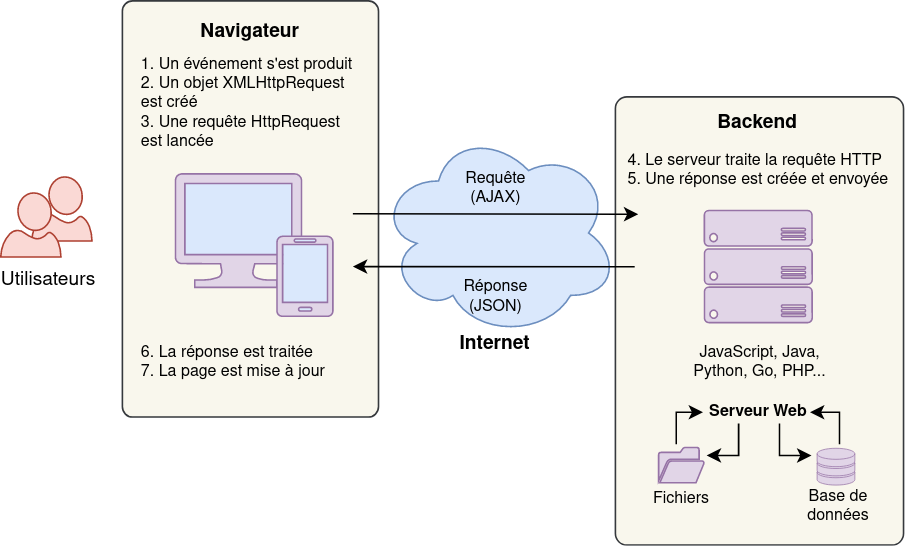

# Protocole HTTP
-----------

Cette section décrit brièvement le fonctionnement du protocole HTTP.

## Un aperçu de HTTP

* HTTP (*Hypertext Transfer Protocol*) est un protocole fondamental dans le fonctionnement d'Internet. Il permet de récupérer diverses ressources telles que des documents HTML, des images et des vidéos depuis des serveurs web. Il fonctionne selon un **modèle client-serveur**, où les requêtes sont initiées par le destinataire, qui est généralement un navigateur web.

* Lorsqu'un utilisateur accède à une page web, son navigateur envoie des requêtes HTTP aux serveurs pour obtenir les ressources nécessaires à l'affichage de la page. Ces ressources peuvent être des sous-documents tels que des images, des feuilles de style CSS et des scripts JavaScript.

* L'ensemble de ces sous-documents est assemblé par le navigateur pour créer le document complet qui est ensuite affiché à l'utilisateur.

<!-- <img src="https://developer.mozilla.org/en-US/docs/Web/HTTP/Overview/fetching_a_page.png" width="800px"/> -->

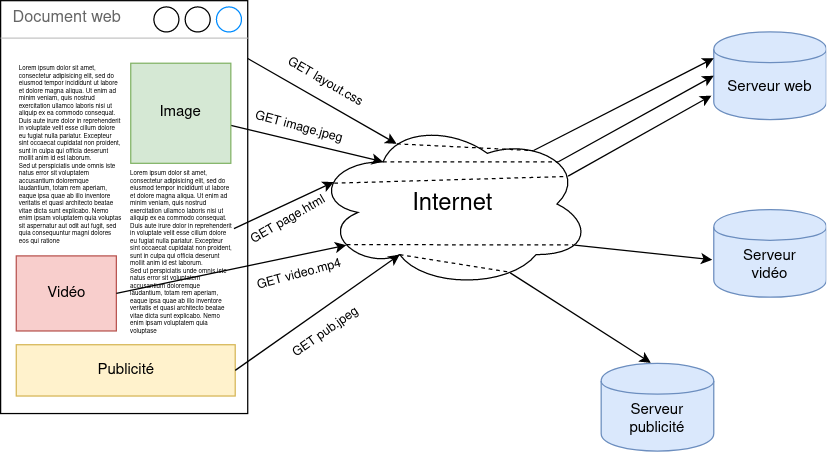

* Dans le cadre des échanges sur le web, les interactions entre les clients et les serveurs sont orchestrées à travers des **requêtes** et des **réponses**. Les requêtes, émanant principalement des navigateurs web, constituent les messages envoyés par le client vers les serveurs. En réponse, les serveurs envoient des messages appelés réponses.

* Le HTTP, en tant que protocole de la couche application, joue un rôle essentiel dans ce processus. Les données, représentées par ces requêtes et réponses, transitent soit via le protocole TCP (*Transmission Control Protocol*), soit à travers une connexion TCP chiffrée via TLS (*Transport Layer Security*).

* Toutefois, le rôle du HTTP ne se limite pas aux requêtes : il est également largement utilisé pour le renvoi de contenus vers les serveurs, participant ainsi à la dynamique des échanges entre les clients et les serveurs sur le réseau.



<img src="https://developer.mozilla.org/en-US/docs/Web/HTTP/Overview/http-layers.png" width="600px"/>

Source: [Mozilla Development Network](https://developer.mozilla.org/fr/docs/Web/HTTP/Overview)

## Flux HTTP

Lorsqu'un client veut communiquer avec un serveur, il réalise les étapes suivantes :

1. Il ouvre une connexion TCP qui sera utilisée pour envoyer une ou plusieurs requêtes et pour recevoir une réponse.
2. Il envoie un message HTTP :
```
GET / HTTP/1.1
Host: www.etsmtl.ca
User-Agent: curl/7.68.0
Accept: */*
```

3. Il lit la réponse envoyée par le serveur :
```
HTTP/1.1 200 OK
Cache-Control: no-cache
Pragma: no-cache
Content-Type: text/html; charset=utf-8
Expires: -1
Server: Microsoft-IIS/10.0
X-AspNetMvc-Version: 5.2
X-AspNet-Version: 4.0.30319
X-Powered-By: ASP.NET
X-UA-Compatible: IE=edge,chrome=1
...

 <!DOCTYPE html>
<html lang="fr-CA">
...
```

4. Il ferme ou réutilise la connexion pour les requêtes suivantes.

## Les messages HTTP

* Les messages HTTP/1.1 et ceux des versions précédentes d'HTTP sont lisibles par des humains.

* Avec HTTP/2 et HTTP/3, ces messages sont intégrés dans une nouvelle structure binaire, une trame, ce qui permet des optimisations telles que la compression des entêtes et le multiplexage.

### Requêtes

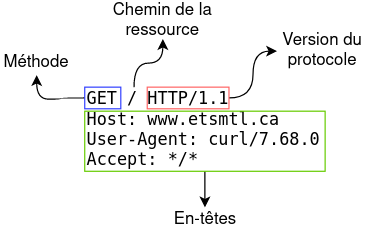

Une requête comprend les éléments suivants :

* Une méthode HTTP, généralement un verbe tel que `GET`, `POST` ou un nom comme `OPTIONS` ou `HEAD` qui définit l'opération que le client souhaite effectuer.
* Le chemin de la ressource à extraire.
* La version du protocole HTTP.
* Les en-têtes optionnels qui transmettent des informations supplémentaires pour les serveurs.
* Un corps pour certaines méthodes comme `POST`.

### Réponses

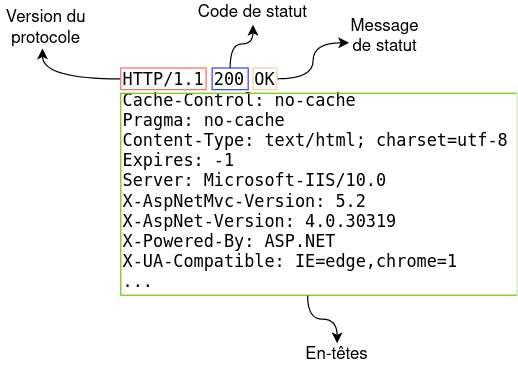

Une réponse comprend les éléments suivants:

* La version du protocole HTTP.
* Un code de statut, qui indique si la requête a réussi ou non.
* Un message de statut.
* Les en-têtes HTTP, comme pour les requêtes.
* Éventuellement un corps contenant la ressource récupérée.

## Structure d'une adresse URL

Une adresse HTTP comprend les éléments suivants :

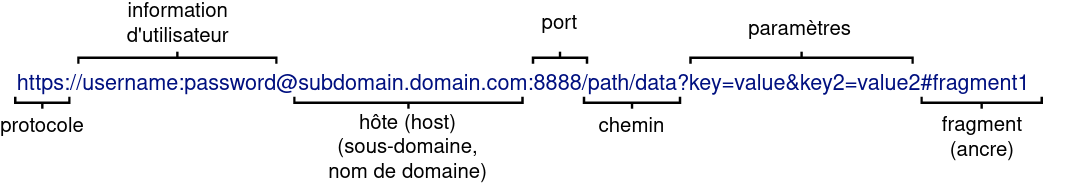

* **Protocole ou schéma** : indique au navigateur le protocole qui doit être utilisé pour récupérer le contenu.
* **Information de l'utilisateur** : nom d'utilisateur et mot de passe.
* **Hôte** : correspond au nom de domaine. Il indique le serveur web auquel le navigateur s'adresse pour échanger le contenu.
* **Port** : correspond au port utilisé sur le serveur web.
* **Chemin** : chemin, sur le serveur web, vers la ressource.
* **Paramètres** : sont des paramètres supplémentaires fournis au serveur web.
* **Fragment ou ancre** : celle-ci désigne un endroit donné de la ressource.

Source: [Comprendre les URL et leur structure](https://developer.mozilla.org/fr/docs/Learn/Common_questions/What_is_a_URL)


# XmlHttpRequest
-------------

* L'objet `XMLHttpRequest` permet d'échanger des données avec un serveur en arrière-plan et de mettre à jour des parties d'une page Web.

* Voici un exemple de comment créer un objet `XMLHttpRequest` :
```javascript
let htr = new XMLHttpRequest();
```

* Pour des raisons de sécurité, les navigateurs n'autorisent pas l'accès entre les domaines.

* Cela signifie que la page Web et le fichier qu'elle essaie de télécharger doivent se trouver sur le même serveur ou domaine.

* Lorsqu'on fait une requête, elle passe par 5 états :

| Valeur | Description |
|-------|-------------|
| `0`  | requête non initialisée |
| `1` | requête créée |
| `2` | requête envoyée |
| `3` | requête en cours |
| `4`  | requête terminée |

* Pour obtenir le résultat de la réponse on peut lier une fonction de rappel (callback) au gestionnaire d'événements `onreadystatechange` ou `onload`.

**Exemple:**

In [2]:
%%writefile document.txt

<span class="card-title">Cours GT525 - AJAX</span>
<p>Ce cours fournit des exemples sur comment utiliser AJAX.</p>
<p>AJAX permet de mettre à jour des parties d'une page sans avoir besoin de la rafraîchir complementment.</p>
<p>Cette fonctionnalité permet d'exécuter du code de façon asynchrone.</p>
<p>Elle peut aussi être utilisé pour créer des applications client-serveur plus complexes.</p>

Writing document.txt


In [3]:
%http_server --port=8000 --directory=/content

Stopping any server listening on port 8000...
Starting server listening on port 8000...


In [4]:
%%html --console

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<h3>Exemple XMLHttpRequest</h3>

<div class="row">
  <div class="col s12 m12 l6 xl6">
    <div class="card blue-grey darken-1">
      <div id="content" class="card-content white-text">
      </div>
    </div>
  </div>
</div>
<div class="row">
  <button id="button" type="button" class="btn">Charger le contenu</button>
</div>

<script>
    function loadContent() {
        let xhr = new XMLHttpRequest();
        xhr.onload = function() {
            if (this.status == 200) {
                document.getElementById("content").innerHTML = this.responseText;
            }
        }
        xhr.open("GET", "https://localhost:8000/document.txt");
        xhr.send();
    }

    const button = document.getElementById("button");
    button.addEventListener('click', loadContent);
</script>

### Quelques méthodes de `XMLHttpRequest` :

* `abort()` : Annule la demande en cours.
* `getAllResponseHeaders()` : Renvoie l'ensemble des en-têtes de la réponse.
* `getResponseHeader()` : Renvoie le texte de l'en-tête voulue.
* `open(méthode,url,async,utilisateur,mot-de-passe)` : Initialise une requête :
    - `méthode` : la méthode HTTP (ex. `GET`, `POST`).
    - `url` : l'adresse de la ressource à charger.
    - `async` (facultatif) : Un booléen optionnel par défaut à `true`, indiquant s'il faut, ou pas, traiter la requête en asynchrone.
    - `utilisateur` (facultatif) : Le nom de l'utilisateur, optionnel, à utiliser dans un but d'authentification.
    - `mot-de-passe` (facultatif) : Le mot de passe, optionnel, à utiliser dans un but d'authentification.    
* `send(corps)` : Envoie la requête au serveur :
    - corps (facultatif) : Le corps des données à envoyer dans la requête (utilisé par `POST`, `PUT`).
* `setRequestHeader()` : Définit la valeur d'un en-tête de requête HTTP.

### Quelques proprietés de l'objet `HttpRequest` :

* `onreadystatechange` : invoqué à chaque fois que l'attribut `readyState` change.
* `readyState` : L'état de la requête sous la forme d'un *unsigned short*.
* `responseText` : Une chaîne de caractères qui contient la réponse à la requête sous forme de texte.
* `responseXML` : Un objet Document qui contient la réponse de la requête.
* `status` : Une valeur qui décrit le statut de la réponse à la requête.
* `statusText` : Une chaîne qui contient la réponse renvoyée par le serveur HTTP.

### Quelques évènements de `XMLHttpRequest` :

* `abort` / `onabort` : Se déclenche lorsqu'une requête a été interrompue
* `error` / `onerror` : Se déclenche lorsqu'une requête a rencontré une erreur.
* `load` / `onload` : Se déclenche lorsqu'une transaction `XMLHttpRequest` se termine correctement.
* `progress` / `onprogress` : Se déclenche périodiquement lorsqu'une requête reçoit des données supplémentaires.
* `timeout` / `ontimeout` : Se déclenche lorsque la progression est terminée du fait de l'expiration de la durée limite.


## Fonctions de rappel (*callback*) et gestion des erreurs

L'exemple ci-dessous vérifie le code de retour HTTP, affecte des fonctions de rappel aux gestionnaires d'événements `onerror` et `ontimeout`. Il déclare aussi une fonction de rappel qui vérifie si une erreur s'est produite lorsque la requête `HttpRequest` est lancée.

In [5]:
%%html
<div id="content"></div>

<script>
function fetchData(url, callback) {
    let xhr = new XMLHttpRequest();
    xhr.open('GET', url);
    xhr.onload = () => {
        if (xhr.status >= 200 && xhr.status <= 299) {
            callback(null, xhr.response);
        } else {
            callback(new Error(`Erreur serveur/réseau: ${xhr.status}, ${xhr.statusText}`));
        }
    };
    // Traite les événements d'erreur et timeout
    xhr.ontimeout = () => callback(new Error('La requête a expiré'));
    xhr.onerror = () => callback(new Error('La requête a échoué'));
    xhr.send();
}

// Le fichier n'existe pas, le serveur ira retourner une erreur...
let url = "https://localhost:8000/document2.txt";

fetchData(url, (err, data) => {
    if (err) {
        document.getElementById("content").innerHTML = err.message;
    } else {
        document.getElementById("content").innerHTML = data;
    }
});
</script>

# JavaScript Object Notation (JSON)
--------

* [JSON (JavaScript Object Notation)](https://www.json.org/json-fr.html) est un format d'échange de données, qui est est utilisé pour sérialiser des objets JavaScript dans des fichiers, les transmettre via une requête ou réponse AJAX, etc.

* La syntaxe est basée sur un sous-ensemble du langage JavaScript.

* JSON se base sur deux structures :
    - Une collection de couples nom/valeur.
    - Une liste de valeurs ordonnées.

Exemples:

```javascript
{"name":"Marie","age":30,"city":"Montreal"}; // objet

{} // objet vide

// tableau d'objets
[{"name":"Marie","age":30},{"name":"Olivier","age":25}]

// object avec la propriété employees qui contient un tableau d'objets
{"employees":[
  {"name":"Marie","age":30},
  {"name":"Catherine","age":25},
  {"name":"Piere","age":31}
]}

// la proprieté employees contient un tableau de chaines
{ "employees":["Marie", "Catherine", "Piere"] }
```

## Sérialisation et désérialisation JSON

* `JSON.parse(string)` est utilisé pour convertir une chaîne JSON en objet JavaScript (désérialiser).


In [ ]:
%%javascript

let json = '{"name":"Marie", "age":30, "city":"Montreal"}';
let obj = JSON.parse(json);
console.log(obj.name + ", " + obj.age + ", " + obj.city);

<classroom_extensions.web.JavascriptWithConsole object>

* `JSON.stringify(object)` est utilisé pour convertir un objet JavaScript en
chaîne JSON (sérialiser).


In [ ]:
%%javascript

let obj = {name:"Marie", age:30, city:"Montreal"};
console.log(JSON.stringify(obj));

<classroom_extensions.web.JavascriptWithConsole object>

## API Faker

* L'API Faker est une collection d'API entièrement gratuites qui aident les développeurs et les concepteurs web à générer de fausses données de manière simple et rapide.
  - Aucune inscription n'est requise.
  - Pas de jetons, pas d'authentification.

* La URL de base de l'API Faker est `https://fakerapi.it/api/v1/{resource}`.
  - Pour la documentation de l'API consultez le [site web de l'API](https://fakerapi.it/en).

* Nous allons utiliser l'API *Images* pour obtenir une adresse vers une image et une description aléatoire.
  - En plus des paramètres communs à toutes les API Faker, l'API Images accepte les paramètres supplémentaires suivants:

|Paramètre|Description|Exemple|
|-----|-----|-----|
|`_type` | 	any, animals, architecture, nature, people, tech, kittens, pokemon 	| `_type=architecture` |
| `_width` |	pixels (default: 640) | `_width=500` |
| `_height` |	pixels (default: 480) | `_height=230` |

* L'exemple ci-dessous utilise [`curl`](https://curl.se/) pour appeler l'API pour obtenir un JSON qui contient des informations sur une photo de chat dont la largeur doit être 300 pixels :

In [6]:
!curl -s -X 'GET' \
  'https://fakerapi.it/api/v1/images?_quantity=2&_type=kittens&_width=300' \
  -H 'accept: application/json' | python -m json.tool | tee faker_output.json

{
    "status": "OK",
    "code": 200,
    "total": 2,
    "data": [
        {
            "title": "Rerum sed pariatur ipsam.",
            "description": "Adipisci ullam nulla mollitia et quia a. Numquam inventore officiis inventore quos. Voluptatem magnam aut harum aliquam et ea totam. Quia animi nemo sit sit.",
            "url": "https://placekitten.com/300/800"
        },
        {
            "title": "Et aut ea adipisci iure sit.",
            "description": "Sunt alias laudantium velit beatae dicta commodi maiores. Architecto placeat illum expedita est. Velit quas officia quia aliquam et earum hic eaque.",
            "url": "https://placekitten.com/300/900"
        }
    ]
}











































* Représentation visuelle de la réponse:

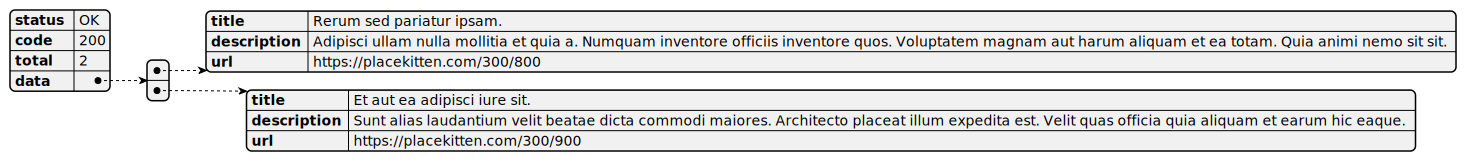

In [7]:
%json --json=faker_output.json

## API Prix Nobel

* L'[API Prix Nobel](https://www.nobelprize.org/about/developer-zone-2/), proposée par [Nobelprize.org](https://www.nobelprize.org/), offre des données ouvertes aux développeurs de deux manières:
  - sous forme d'API et
  - sous forme de données liées.

* Nous utiliserons la version 2.1 de cette API pour quelques exemples et activités.

* L'exemple ci-dessous utilise `curl` pour faire une requête à l'API pour obtenir un JSON qui contient la liste des lauréats dont le nom est `Alice` et le pays est `Canada`:

In [8]:
!curl -s -X 'GET' \
  'https://api.nobelprize.org/2.1/laureates?name=Alice&birthCountry=Canada' \
  -H 'accept: application/json' | python -m json.tool

{
    "laureates": [
        {
            "id": "892",
            "knownName": {
                "en": "Alice Munro",
                "se": "Alice Munro"
            },
            "givenName": {
                "en": "Alice",
                "se": "Alice"
            },
            "familyName": {
                "en": "Munro",
                "se": "Munro"
            },
            "fullName": {
                "en": "Alice Munro",
                "se": "Alice Munro"
            },
            "fileName": "munro",
            "gender": "female",
            "birth": {
                "date": "1931-07-10",
                "place": {
                    "city": {
                        "en": "Wingham",
                        "no": "Wingham",
                        "se": "Wingham"
                    },
                    "country": {
                        "en": "Canada",
                        "no": "Canada",
                        "se": "Kanada"
                    },
     

* L'exemple qui suit utilise `XMLHttpRequest` pour envoyer une requête à l'API et obtenir la liste des canadiens lauréats du Prix Nobel. Ensuite, une fonction de rappel construit un tableau avec les résultats :

In [ ]:
%%html
<style>
    body { font-family: Helvetica; }
    td { padding: 2px 5px; }
    th { background-color: lightgrey; padding: 4px 5px; }
</style>

<body>
<h3>Canadiens lauréats du prix Nobel</h3>
<div id="content"></div>

<script>
    // Lance une requête et recupère le JSON de réponse
    function fetchData(url, callback) {
        let xhr = new XMLHttpRequest();
        xhr.responseType = 'json';
        xhr.open('GET', url);
        xhr.onload = () => {
            if (xhr.status >= 200 && xhr.status <= 299) {
                callback(null, xhr.response);
            } else {
                callback(new Error(`Erreur réseau: ${xhr.status}, ${xhr.statusText}`));
            }
        };
        xhr.onerror = () => callback(new Error('La requête a échoué'));
        xhr.send();
    }

    /* Le JSON de réponse a plusieurs objets imbriqués.
       Cette founction cherche une proprieté à partir d'une chaine.
       Ex. birth.place.country.en */
    function findProperty(obj, prop, defValue = null) {
        prop = prop.split('.');
        for (let i = 0; i < prop.length; i++) {
            if (typeof obj[prop[i]] == 'undefined')
                return defValue;
            obj = obj[prop[i]];
        }
        return obj;
    }

    /*
     "birth.place.country.en"

     {
       "birth": {
          "place": {
            "country" : {
              "en" : "Canada"
            }
          }
       }
     }
    */

    // Pour construire le tableau avec les résultats
    function buildTable(data, fields) {
        let table = document.createElement("table");

        // Crée l'en-tête du tableau
        let header = document.createElement("tr");
        Object.keys(fields).forEach((field) => {
            let cell = document.createElement("th");
            cell.appendChild(document.createTextNode(fields[field]));
            header.appendChild(cell);
        });
        table.appendChild(header);

        // Crée les lignes du tableau
        data.forEach((object) => {
            let row = document.createElement("tr");
            Object.keys(fields).forEach((field) => {
                let cell = document.createElement("td");
                cell.appendChild(document.createTextNode(findProperty(object, field)));
                row.appendChild(cell);
            });
            table.appendChild(row);
        });
        return table;
    }

    const API_URL = 'https://api.nobelprize.org/2.1/';
    const FIELDS = {
        "fullName.en": "Nom",
        "birth.place.city.en": "Ville de naissance",
        "birth.place.country.en": "Pays",
    };

    const country = 'Canada';
    const url = `${API_URL}/laureates?birthCountry=${country}`;

    fetchData(url, (err, data) => {
        if (err) {
            document.getElementById("content").innerHTML = JSON.stringify(err.message);
        } else {
            let table = buildTable(data["laureates"], FIELDS);
            document.getElementById("content").appendChild(table);
        }
    });
</script>

# Activité en classe
----------

## Liste de chats

* Complétez le code ci-dessous. Utilisez AJAX pour appeler l'API Faker et obtenir les informations sur un nombre donnée de photos de chat de hauteur 300px.

* Ensuite, pour chacun des items dans l'élément `data` du JSON retournée, créez via l'API de manipulation du DOM des éléments `<h4>`, `<img>` et `<p>` qui doivent afficher respectivement le `title`, `url` et `description` pour chaque item de `data`.

* Ajoutez les éléments `<h4>`, `<img>` et `<p>` crées au `<div>` dont l'identifiant est `content`.

<!--
  // Lance une requête et recupère le JSON de réponse
  function fetchData(url, callback) {
    let xhr = new XMLHttpRequest();
    xhr.responseType = 'json';
    xhr.open('GET', url);
    xhr.onload = () => {
        if (xhr.status >= 200 && xhr.status <= 299) {
            callback(null, xhr.response);
        } else {
            callback(new Error(`Erreur serveur/réseau: ${xhr.status}, ${xhr.statusText}`));
        }
    };
    // Traite les événements d'erreur et timeout
    xhr.ontimeout = () => callback(new Error('La requête a expiré'));
    xhr.onerror = () => callback(new Error('La requête a échoué'));
    xhr.send();
  }

  const API_URL = 'https://fakerapi.it/api/v1';
  const type = 'kittens';
  const height = 300;
  const quantity = 2;
  const url = `${API_URL}/images?_quantity=${quantity}&_type=${type}&_height=${height}`;

  fetchData(url, (err, json) => {
    if (err || json.code != 200) {
        document.getElementById("content").innerHTML = err.message;
    } else {
        json.data.forEach( item => {
          let h4 = document.createElement("h4");
          h4.innerText = item.title;
          let img = document.createElement("img");
          img.src = item.url;
          let p = document.createElement("p");
          p.innerText = item.description;
          document.getElementById("content").append(h4, img, p);
        });
    }
  });
-->

In [9]:
%%html --console

<div id="content"></div>

<script>

  // Complétez le code...
   // Lance une requête et recupère le JSON de réponse
  function fetchData(url, callback) {
    let xhr = new XMLHttpRequest();
    xhr.responseType = 'json';
    xhr.open('GET', url);
    xhr.onload = () => {
        if (xhr.status >= 200 && xhr.status <= 299) {
            callback(null, xhr.response);
        } else {
            callback(new Error(`Erreur serveur/réseau: ${xhr.status}, ${xhr.statusText}`));
        }
    };
    // Traite les événements d'erreur et timeout
    xhr.ontimeout = () => callback(new Error('La requête a expiré'));
    xhr.onerror = () => callback(new Error('La requête a échoué'));
    xhr.send();
  }

  const API_URL = 'https://fakerapi.it/api/v1';
  const type = 'kittens';
  const height = 300;
  const quantity = 2;
  const url = `${API_URL}/images?_quantity=${quantity}&_type=${type}&_height=${height}`;

  fetchData(url, (err, json) => {
    if (err || json.code != 200) {
        document.getElementById("content").innerHTML = err.message;
    } else {
        json.data.forEach( item => {
          let h4 = document.createElement("h4");
          h4.innerText = item.title;
          let img = document.createElement("img");
          img.src = item.url;
          let p = document.createElement("p");
          p.innerText = item.description;
          document.getElementById("content").append(h4, img, p);
        });
    }
  });

</script>

## Lister les prix Nobel par catégorie

* L'exemple ci-dessous utilise `curl` pour envoyer une requête à l'API pour obtenir un JSON qui contient la liste des prix Nobel en Physique pour l'année 2021 :

In [10]:
!curl -s -X 'GET' \
  'https://api.nobelprize.org/2.1/nobelPrizes?nobelPrizeYear=2021&nobelPrizeCategory=phy' \
  -H 'accept: application/json' | python -m json.tool | tee laureates.json

{
    "nobelPrizes": [
        {
            "awardYear": "2021",
            "category": {
                "en": "Physics",
                "no": "Fysikk",
                "se": "Fysik"
            },
            "categoryFullName": {
                "en": "The Nobel Prize in Physics",
                "no": "Nobelprisen i fysikk",
                "se": "Nobelpriset i fysik"
            },
            "dateAwarded": "2021-10-05",
            "topMotivation": {
                "en": "for groundbreaking contributions to our understanding of complex physical systems"
            },
            "prizeAmount": 10000000,
            "prizeAmountAdjusted": 10836735,
            "links": [
                {
                    "rel": "nobelPrize",
                    "href": "https://api.nobelprize.org/2/nobelPrize/phy/2021",
                    "action": "GET",
                    "types": "application/json"
                }
            ],
            "laureates": [
                {
       

* Représentation visuelle de la réponse:

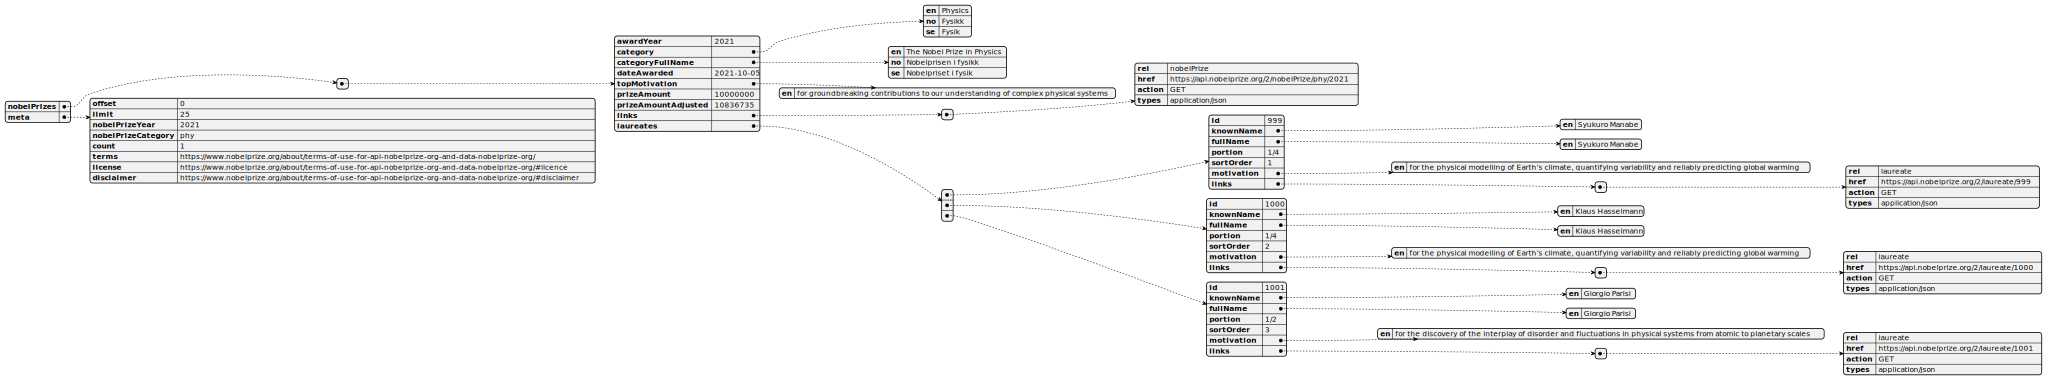

In [11]:
%json --json=laureates.json

* Observez que le JSON de réponse contient un objet dont la propriété `nobelPrizes` contient un tableau avec les prix et la liste de lauréats (`laureates`).
* Basé sur l'exemple précédent, vouz devez completer le code ci-dessous. Il doit utiliser AJAX pour faire une requête à l'API et obtenir la liste de prix Nobels et lauréats pour une catégorie donnée lorsque le choix du `<select>` change.
* Complétez le code de la fonction `categoryChange` pour :
  - Obtenir la valeur de l'élément sélectionné par le `<select>`.
  - Utilisez cette valeur pour créer la URL pour la requête :
    - Ex. `https://api.nobelprize.org/2.1/nobelPrizes?nobelPrizeYear=2021&nobelPrizeCategory=phy`
  - Ajoutez un tableau au `<div>` `content` avec quelques informations sur les lauréats.
  - Également à l'exemple précédent, les champs du tableau sont définis par la constante `FIELDS`.

Le résultat attendu doit ressembler à celui ci-dessous :


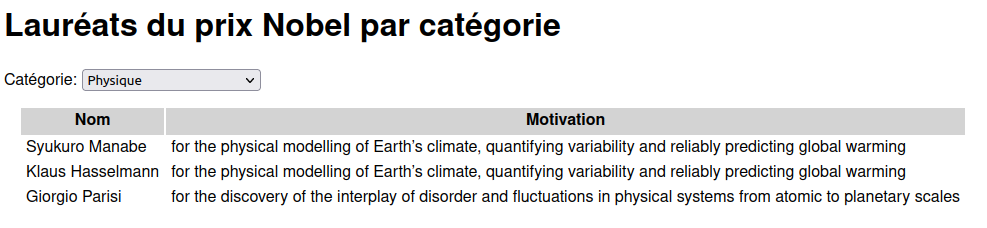

In [12]:
%%html

<style>
    body { font-family: Helvetica; }
    td { padding: 2px 5px; }
    th { background-color: lightgrey; padding: 4px 5px; }
</style>

<h4>Lauréats du prix Nobel par catégorie</h4>

<div>
  <label for="fcategory">Catégorie:</label>
  <select id="fcategory" name="category">
    <option value="--">Choisissez une catégorie</option>
    <option value="che">Chimie</option>
    <option value="med">Physiologie ou médecine</option>
    <option value="lit">Littérature</option>
    <option value="pea">Paix</option>
    <option value="eco">Économie</option>
    <option value="phy">Physique</option>
  </select>
</div>

<div id="content"></div>

<script>

    // Lance une requête et recupère le JSON de réponse
    function fetchData(url, callback) {
        const xhr = new XMLHttpRequest();
        xhr.responseType = 'json';
        xhr.open('GET', url);
        xhr.onload = () => {
            if (xhr.status >= 200 && xhr.status <= 299) {
                callback(null, xhr.response);
            } else {
                callback(new Error(`Erreur réseau: ${xhr.status}, ${xhr.statusText}`));
            }
        };
        xhr.onerror = () => callback(new Error('La requête a échoué'));
        xhr.send();
    }

    /* Le JSON de réponse a plusieurs objets imbriqués.
       Cette founction cherche une proprieté à partir d'une chaine.
       Ex. birth.place.country.en */
    function findProperty(obj, prop, defValue = null) {
        prop = prop.split('.');
        for (let i = 0; i < prop.length; i++) {
            if (typeof obj[prop[i]] == 'undefined')
                return defValue;
            obj = obj[prop[i]];
        }
        return obj;
    }

    // Pour construire le tableau avec les résultats
    function buildTable(data, fields) {
        let table = document.createElement("table");

        // Crée l'en-tête du tableau
        let header = document.createElement("tr");
        Object.keys(fields).forEach((field) => {
            let cell = document.createElement("th");
            cell.appendChild(document.createTextNode(fields[field]));
            header.appendChild(cell);
        });
        table.appendChild(header);

        // Crée les lignes du tableau
        data.forEach((object) => {
            let row = document.createElement("tr");
            Object.keys(fields).forEach((field) => {
                let cell = document.createElement("td");
                cell.appendChild(document.createTextNode(findProperty(object, field)));
                row.appendChild(cell);
            });
            table.appendChild(row);
        });
        return table;
    }

    const YEAR = 2021;
    const API_URL = `https://api.nobelprize.org/2.1/nobelPrizes?nobelPrizeYear=${YEAR}`;
    const FIELDS = {
        "fullName.en": "Nom",
        "motivation.en": "Motivation"
    };

    const categoryChange = (ev) => {
        // Completez le code...

        // obtenir la valeur du select
        const category = ev.target.value;
        const divContent = document.getElementById("content");

        if (category !== '--') {
          // creer la URL de la requete
          // appeler fetchData...
          // construire le tableau
          divContent.innerHTML = "";
          let url = `${API_URL}&nobelPrizeCategory=${category}`;

          fetchData(url, (err, data) => {
            if (err) {
              divContent.innerHTML = JSON.stringify(err.message);
            } else {
              let table = buildTable(data.nobelPrizes[0].laureates, FIELDS);
              document.getElementById("content").appendChild(table);
            }
          });
        }
    }

    let selectCategory = document.getElementById("fcategory");
    selectCategory.selectedIndex = 0;
    selectCategory.addEventListener('change', categoryChange);

</script>



<!--
  const categoryChange = (ev) => {
        // obtenir la valeur du select
        const category = ev.target.value;
        const divContent = document.getElementById("content");

        if (category !== '--') {
          // creer la URL de la requete
          // appeler fetchData...
          // construire le tableau
          divContent.innerHTML = "";
          let url = `${API_URL}&nobelPrizeCategory=${category}`;
          
          fetchData(url, (err, data) => {
            if (err) {
              divContent.innerHTML = JSON.stringify(err.message);
            } else {
              let table = buildTable(data.nobelPrizes[0].laureates, FIELDS);
              document.getElementById("content").appendChild(table);
            }
          });
        }
    }
-->

# API Fetch
----------

* L'API Fetch fournit une interface JavaScript pour l'accès et la manipulation des parties de la pipeline HTTP, comme les requêtes et les réponses.

* Fetch fournit aussi une méthode globale `fetch()` qui procure un moyen facile et logique de récupérer des ressources à travers le réseau de manière asynchrone.

* Fetch est basée sur les promesses (promises), ce qui permet d'éviter de devoir associer de nombreux callbacks.
  - Nous regarderons les promesses en détail plus tard.

## Créer une requête fetch

* Exemple de requête `fetch` basique :
```javascript
fetch('image.png')
  .then(function (response) {
      return response.blob();
  })
  .then(function (blob) {
      const objectURL = URL.createObjectURL(blob);
      image.src = objectURL;
  });
```

* L'exemple récupère une image à travers le réseau et l'insère dans un élément `<img>`
* Dans cet exemple, `fetch()` prend en argument le chemin de la ressource et retourne une promesse (promise) contenant un objet [Response](https://developer.mozilla.org/fr/docs/Web/API/Response).
* La méthode `blob()` est utilisée pour extraire le contenu de l'image de la réponse HTTP.
* L'objet `objectURL` créé à partir du blob est inseré dans `<img>`

Voici ci-dessous un exemple qui utilise `fetch` pour changer l'image associée à un élément `<img>` :

In [ ]:
%%html

<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css">

<style>
    span {
        padding: 1px 8px;
        display: table;
    }
</style>

<h3>Exemple Fetch</h3>
<img id="image1" src="https://upload.wikimedia.org/wikipedia/en/5/53/Snoopy_Peanuts.png" height="250px"/>
<span><button class="btn" id="btn1" type="button">Charger d'image</button></span>

<script>
    const CHARACTERS = [
        {file: "5/53/Snoopy_Peanuts.png", name: "Snoopy"},
        {file: "2/22/Charlie_Brown.png", name: "Charlie Brown"},
        {file: "2/24/Marcie_from_Peanuts.png", name: "Marcie"},
        {file: "5/5e/Linus_van_Pelt.gif", name: "Linus van Pelt"},
        {file: "e/e9/Lucy_van_Pelt.png", name: "Lucy van Pelt"},
        {file: "a/a0/Peppermint_Patty.png", name: "Peppermint Patty"},
        {file: "8/88/Sally_Brown.png", name: "Sally Brown"},
        {file: "b/b7/Schroeder_Piano.png", name: "Schroeder"},
        {file: "e/e1/PigPen_(Peanuts).png", name: "Pig-Pen"},
        {file: "9/9d/Franklin_(Peanuts).png", name: "Franklin"},
        {file: "d/db/Woodstock.png", name: "Woodstock"},
    ];
    const wiki = "https://upload.wikimedia.org/wikipedia/en/";

    function changeImage() {
        const image = document.getElementById("image1");
        const character = CHARACTERS[Math.floor(Math.random() * CHARACTERS.length)];
        const url = `${wiki}/${character.file}`;

        // fetch pour obtenir la ressource
        fetch(url)
            .then(function (response) {
                return response.blob();
            })
            .then(function (blob) {
                const objectURL = URL.createObjectURL(blob);
                image.src = objectURL;
            });
    }

    // ajout du gestionaire d'evenements
    document.getElementById("btn1").addEventListener("click", changeImage);
</script>

## La réponse (`Response`)

* L'interface `Response` représente la réponse d'une requête initialisée :
    - `headers` : objet qui contient les en-têtes de réponse (se comporte comme un tableau associatif).
    - `status` : code numérique de statut.
    - `statusText` : message de statut correspondant au code numérique.
    - `ok` : valeur booléenne qui renvoie `true` si 200 <= `status` <= 299.
    - `url` : url de la réponse (utile si la requête a été redirigée).

* La réponse implémente l'interface [Body](https://developer.mozilla.org/en-US/docs/Web/API/Fetch_API/Using_Fetch#body)
  - Patron de conception [mixin](https://javascript.info/mixins)
  - il est donc possible d'accéder aux méthodes du flux de réponse

## Fournir des options à la requête

* La méthode `fetch()` accepte un paramètre optionnel, `options` qui permet de passer des paramètres supplémentaires à la requête :
```javascript
const myHeaders = new Headers();

 const options = { method: 'GET',
                 headers: myHeaders,
                 mode: 'cors',
                 cache: 'default' };

 fetch('image.png', options)
  .then(function(response) {
      return response.blob();
  })
  .then(function(myBlob) {
      const objectURL = URL.createObjectURL(myBlob);
      myImage.src = objectURL;
  });
```

## Le corps d'une requête/réponse

Autant une requête qu'une réponse peut contenir un corps avec des données des types suivants:

* `ArrayBuffer`

* `ArrayBufferView`
* `Blob/Fichier`
* chaine de caractères
* `URLSearchParams`
* `FormData`

L'interface *mixin* [`Body`](https://developer.mozilla.org/en-US/docs/Web/API/Fetch_API/Using_Fetch#body) définit les méthodes pour extraire le corps d'une requête ou d'une réponse :

* `blob` : expose le contenu selon une interface `Blob` (binaire).

* `json` : expose le contenu sous forme d'objet JSON.
* `text` : expose le contenu sous forme textuelle.
* `arrayBuffer` : expose le contenu selon une interface `ArrayBuffer`
(binaire).
* `formData` : expose le contenu sous forme d'un ensemble de paires clé/valeur représentant les champs du formulaire et leurs valeurs.

## Gestion des erreurs

* Une promesse `fetch()` renvoie une `TypeError` losrqu'un problème réseau ou de permission s'est produit.
    - un code `HTTP 404` ne constitue pas une erreur réseau.
* Un test de la réussite de `fetch()` doit inclure la vérification que la promesse soit résolue, puis vérifier que la propriété `Response.ok` ait la valeur `true`.

```javascript
fetch('image.png').then(function(response) {
    if(response.ok) {
        response.blob().then(function(myBlob) {
            let objectURL = URL.createObjectURL(myBlob);
            myImage.src = objectURL;
        });
    } else {
        console.log('Mauvaise réponse du réseau.');
    }
})
.catch(function(error) {
    console.log('Problème avec l\'opération fetch: ' + error.message);
});

```

Voici ci-dessous la version `fetch()` de l'exemple qui récupère et affiche les noms de canadiens lauréats du prix Nobel :

In [ ]:
%%html --console

<style>
    body { font-family: Helvetica; }
    td { padding: 2px 5px; }
    th { background-color: lightgrey; padding: 4px 5px; }
</style>

<h3>Canadiens lauréats du prix Nobel</h3>
<div id="content"></div>

<script>

    /* Le JSON de réponse a plusieurs objets imbriqués.
       Cette founction cherche une proprieté à partir d'une chaine.
       Ex. birth.place.country.en */
    function findProperty(obj, prop, defValue = null) {
        prop = prop.split('.');
        for (let i = 0; i < prop.length; i++) {
            if (typeof obj[prop[i]] == 'undefined')
                return defValue;
            obj = obj[prop[i]];
        }
        return obj;
    }

    // Pour construire le tableau avec les résultats
    function buildTable(data, fields) {
        let table = document.createElement("table");

        // Crée l'en-tête du tableau
        let header = document.createElement("tr");
        Object.keys(fields).forEach((field) => {
            let cell = document.createElement("th");
            cell.appendChild(document.createTextNode(fields[field]));
            header.appendChild(cell);
        });
        table.appendChild(header);

        // Crée les lignes du tableau
        data.forEach((object) => {
            let row = document.createElement("tr");
            Object.keys(fields).forEach((field) => {
                let cell = document.createElement("td");
                cell.appendChild(document.createTextNode(findProperty(object, field)));
                row.appendChild(cell);
            });
            table.appendChild(row);
        });
        return table;
    }

    function checkResponse(response) {
        if (!response.ok) {
            throw Error(`${response.status} - ${response.statusText}`);
        }
        return response;
    }

    const API_URL = 'https://api.nobelprize.org/2.1/';
    const FIELDS = {
        "fullName.en": "Nom",
        "birth.place.city.en": "Ville de naissance",
        "birth.place.country.en": "Pays",
    };

    const country = 'Canada';
    const url = `${API_URL}/laureates?birthCountry=${country}`;

    fetch(url)
        .then(checkResponse)
        .then(response => response.json())
        .then(data => {
            let table = buildTable(data["laureates"], FIELDS);
            document.getElementById("content").appendChild(table);
        })
        .catch(error => console.log(error.message));

</script>

# Activité en classe
-----------

## Lister les prix Nobel par catégorie - Version fetch

Créez une version `fetch` de l'activité précédente, qui récupère et affiche les prix Nobels de 2021 par catégorie.

<!--
// obtenir la valeur du select
        const category = ev.target.value;
        const divContent = document.getElementById("content");

        if (category !== '--') {
          divContent.innerHTML = "";
          let url = `${API_URL}&nobelPrizeCategory=${category}`;

          fetch(url)
            .then(function(response) {
                if (!response.ok)
                  throw Error(`${response.status} - ${response.statusText}`);
                return response;
            })
            .then((response) => {return response.json()})
            .then(data => {
                let table = buildTable(data.nobelPrizes[0].laureates, FIELDS);
                document.getElementById("content").appendChild(table);
            })
            .catch(error => divContent.innerHTML = error.message);
        }
-->

In [ ]:
%%html

<style>
    body { font-family: Helvetica; }
    td { padding: 2px 5px; }
    th { background-color: lightgrey; padding: 4px 5px; }
</style>

<h3>Lauréats du prix Nobel par catégorie</h3>

<div>
  <label for="fcategory">Catégorie:</label>
  <select id="fcategory" name="category">
    <option value="--">Choisissez une catégorie</option>
    <option value="che">Chimie</option>
    <option value="med">Physiologie ou médecine</option>
    <option value="lit">Littérature</option>
    <option value="pea">Paix</option>
    <option value="eco">Économie</option>
    <option value="phy">Physique</option>
  </select>
</div>

<div id="content"></div>

<script>

    /* Le JSON de réponse a plusieurs objets imbriqués.
       Cette founction cherche une proprieté à partir d'une chaine.
       Ex. birth.place.country.en */
    function findProperty(obj, prop, defValue = null) {
        prop = prop.split('.');
        for (let i = 0; i < prop.length; i++) {
            if (typeof obj[prop[i]] == 'undefined')
                return defValue;
            obj = obj[prop[i]];
        }
        return obj;
    }

    // Pour construire le tableau avec les résultats
    function buildTable(data, fields) {
        let table = document.createElement("table");

        // Crée l'en-tête du tableau
        let header = document.createElement("tr");
        Object.keys(fields).forEach((field) => {
            let cell = document.createElement("th");
            cell.appendChild(document.createTextNode(fields[field]));
            header.appendChild(cell);
        });
        table.appendChild(header);

        // Crée les lignes du tableau
        data.forEach((object) => {
            let row = document.createElement("tr");
            Object.keys(fields).forEach((field) => {
                let cell = document.createElement("td");
                cell.appendChild(document.createTextNode(findProperty(object, field)));
                row.appendChild(cell);
            });
            table.appendChild(row);
        });
        return table;
    }

    const categoryChange = (ev) => {
        // Completez le code...

        // obtenir la valeur du select
        const category = ev.target.value;
        const divContent = document.getElementById("content");

        if (category !== '--') {
          divContent.innerHTML = "";
          let url = `${API_URL}&nobelPrizeCategory=${category}`;

          fetch(url)
            .then(function(response) {
                if (!response.ok)
                  throw Error(`${response.status} - ${response.statusText}`);
                return response;
            })
            .then((response) => {return response.json()})
            .then(data => {
                let table = buildTable(data.nobelPrizes[0].laureates, FIELDS);
                document.getElementById("content").appendChild(table);
            })
            .catch(error => divContent.innerHTML = error.message);
        }
    }

    const YEAR = 2021;
    const API_URL = `https://api.nobelprize.org/2.1/nobelPrizes?nobelPrizeYear=${YEAR}`;
    const FIELDS = {
        "fullName.en": "Nom",
        "motivation.en": "Motivation"
    };

    let selectCategory = document.getElementById("fcategory");
    selectCategory.selectedIndex = 0;
    selectCategory.addEventListener('change', categoryChange);

</script>

# JavaScript asynchrone
----------

JavaScript est un langage en constante évolution. Certaines nouveautés sont parfois du sucre syntaxique, mais certains ajouts proposent de nouveaux paradigmes qui simplifient beaucoup la conception logicielle et l'écriture du code. Les prochaines sections décrivent deux fonctionnalités qui ont été introduites dans les normes plus récentes du langage: les promesses et les fonctions asynchrones.

## Versions ECMAScript

* ECMAScript (ES) est l'ensemble de normes concernant les langages de programmation de type script (tels que JavaScript) et standardisés par Ecma International dans le cadre de la spécification ECMA-262.

* Au total [quatorze éditions de l'ECMA-262 ont été publiées](https://www.ecma-international.org/publications-and-standards/standards/ecma-262/). Les travaux sur la version 14 de la norme ont été finalisés en juin 2023.

* Le tableau ci-dessous présente un résumé des principaux ajouts de chaque version des normes:

|Édition |	Date | Nom |	Principaux changements	|
|--|--|--|--|
|	1 | 1997 | | Première edition |
|2 | 1998	|  | (Alignement avec standard ISO)	|
|3 | 1999 |	 | Première version “significative”	|
|4 | | 	|(Abandonné)|
|5 | 2009 | | 	Mode strict, JSON, réflexion, extension du modèle objet – deuxième version “signicative”	|
|5.1| 2011 | |	(Alignement avec standard ISO)	|
| 6 | 2015 | ECMAScript 2015 (ES2015)  |Changements majeurs: classes, modules, déstructuration, const, let, collections, générateurs, <br><br> fonctions fléchées, promesses, tableaux typés, réflexion, proxies, symboles, etc.	|
| 7 | 2016 | ECMAScript 2016 (ES2016)	|	Déstructuration, opérateur **, await/async, portée de bloc des fonctions-variables	|
|8 | 2017 | ECMAScript 2017 (ES2017)	| Déstructuration avancée, async/await avec générateurs et promesses, concurrence/atomiques	|
| 9 | 2018 | ECMAScript 2018 (ES2018) |Opérateurs rest/spread pour variables, itérations asynchrones, finally pour promesses, regexp	|
| 10 | 2019 | ECMAScript 2019 (ES2019)	|	Ajouts à Array, Object, String, Symbol, changements à try/catch, JSON |
| 11 | 2020 |	ECMAScript 2020 (ES2020) | BigInt, operateur ?? |
| 12 | 2021 | ECMAScript 2021 (ES2021) | string.replaceAll, Promise.any, AggregateError, operateurs ?=, &&= et \|\|=, WeakRef, etc. |
| 13 | 2022 | ECMAScript 2022 (ES2022) | `await` de haut niveau, nouveaux éléments de classes, `Object.hasOwn()`, etc |
| 14 | 2023 | ECMAScript 2023 (ES2023) | Les mèthodes `toSorted`, `toReversed`, `with`, `findLast`, et `findLastIndex` dans <br><br>`Array.prototype` et `TypedArray.prototype`. Les mèthodes `toSpliced` dans `Array.prototype`, etc. |


Pour aller plus loin, consultez la matrice de compatibilité disponible sur [ce site](https://compat-table.github.io/compat-table/).

## Transpilation

* Afin d'améliorer la compatibilité, plusieurs outils ont été développés visant à convertir ("transpiler") le code JavaScript qui utilise des éléments nouveaux afin qu'il puisse s'exécuter sur des engins supportant des versions plus anciennes (ou alternatives) de JavaScript.

* Les transpilateurs sont habituellement exécutés comme étape du pipeline de "compilation" JavaScript.

* Le plus connu est [Babel](https://babeljs.io/), qui permet de convertir du code JavaScript d'une version à l'autre et qui propose des polyfills pour implémenter des fonctionnalités manquantes

## Programmation asynchrone

* Dans un modèle de programmation synchrone, les choses se produisent une par une.
  - Lorsqu'une fonction `f` exécute une action de longue durée, elle se déroule sans interruption.
  - Si une autre fonction `g` dépend du résultat de la fonction `f`, la fonction `g` doit attendre que `f` se termine et retourne sa réponse.

* Tel qu'on l'a vu lors du cours précédent, la programmation asynchrone permet de mieux utiliser les ressources disponibles et d'exécuter plusieurs tâches de façon concurrente.

* Les environnements de programmation (les navigateurs dans le cas du développement web) fournissent des API pour exécuter des tâches de manière asynchrone.

## Fonctions de rappel (callbacks)
Tel qu'on l'a vu dans les cahiers précédents, une approche asynchrone consiste à faire en sorte que les fonctions qui effectuent une action lente prennent un argument supplémentaire, une fonction de rappel (*callback*). L'action démarre, et lorsqu'elle se termine, la fonction de rappel est appelée avec le résultat.

### Exemples:
* Une fonction de rappel fournie à `setTimeout()`:

In [ ]:
%%javascript

setTimeout(() => console.log("Une seconde ecoulée..."), 1000);

<classroom_extensions.web.JavascriptWithConsole object>

## Le problème des fonctions de rappel

Prenons l'exemple de la commande d'une pizza. Certaines étapes doivent être franchies pour que la commande soit réussie :

1. **Choisir les garnitures:** Cela peut prendre un certain temps, et peut échouer si on n'arrive pas à nous décider.

2. **Passer ensuite la commande:** Cette étape peut prendre un certain temps aussi et peut échouer si le restaurant ne dispose pas des ingrédients nécessaires à la cuisson.

3. **Récupérer la pizza et la manger:** Cela peut échouer si, par exemple, on oublie le portefeuille et qu'on ne peut pas payer la pizza.

```javascript
chooseToppings(function(toppings) {
  placeOrder(toppings, function(order) {
    collectOrder(order, function(pizza) {
      eatPizza(pizza);
    }, failureCallback);
  }, failureCallback);
}, failureCallback);
```

Le code ci-dessus est désordonné et difficile à lire:

* Il nécessite que `failureCallback()` soit appelée plusieurs fois.

* Il contient plusieurs fonctions imbriquées.

* [Callback hell](http://callbackhell.com/), [Pyramide condamnée](https://fr.wikipedia.org/wiki/Pyramide_condamn%C3%A9e)

# Les promesses (promises)
---------------

* Les promesses fournissent un concept abstrait pour faciliter la programmation asynchrone.

* Au lieu de faire en sorte qu'une fonction soit appelée à un moment donné dans le futur, une promesse renvoie un objet qui représente cet événement futur (donc, le terme promesse).

* **Une promesse est une action asynchrone qui peut se terminer à un moment donné et produire une valeur.** Elle est capable d'informer une fonction intéressée lorsque sa valeur est disponible.

## Créer des promesses

* Le moyen le plus simple de créer une promesse consiste à appeler `Promise.resolve`. Cette fonction garantit que la valeur fournie soit enveloppée dans une promesse.
  - S'il s'agit déjà d'une promesse, elle est simplement renvoyée.
  - Sinon, on obtient une nouvelle promesse qui se termine immédiatement avec la valeur comme résultat.

In [ ]:
%%javascript

let fifteen = Promise.resolve(15);

fifteen.then(value => console.log(`Valeur: ${value}`));

<classroom_extensions.web.JavascriptWithConsole object>

* Pour obtenir le résultat d'une promesse, on utilise sa méthode `then`.
  - **Cela enregistre une fonction de rappel à appeler lorsque la promesse se résout et qu'elle produit une valeur.**
* La méthode `then` renvoie une autre promesse, qui se résout en la valeur renvoyée par la fonction de gestionnaire ou, si elle renvoie une promesse, attend cette promesse, puis se résout en son résultat.

### Des promesses personnalisées

* Une autre façon de créer une promesse est d'utiliser `Promise` [comme fonction constructeur](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/Promise/Promise).
  - Le constructeur attend une fonction comme argument (`executor`), qu'il appelle immédiatement, en lui passant une fonction que l'`executor` peut utiliser pour résoudre la promesse.

In [ ]:
%%javascript

const promise = new Promise((resolve, reject) => {
  setTimeout(() => {
    resolve('Promesse resolue');
  }, 5000);
});

promise.then(value => {
  console.log("Valeur: " + value);
});

<classroom_extensions.web.JavascriptWithConsole object>

* Il est possible de créer des fonctions qui renvoient des promesses:

In [ ]:
%%html --console

<div id="content"></div>

<script>
function fetchJSON(url) {
  return new Promise((resolve, reject) => {
    const xhr = new XMLHttpRequest();
    xhr.responseType = 'json';
    xhr.open('GET', url);
    xhr.onload = () => resolve(xhr.response);
    xhr.onerror = () => reject(xhr.statusText);
    xhr.send();
  });
}

const url = 'https://fakerapi.it/api/v1/images?_quantity=1&_type=pokemon&_width=300';

fetchJSON(url)
  .then(json => {
    if (json.code != 200) {
      console.log(json.status);
    } else {
      json.data.forEach( item => {
        let img = document.createElement("img");
        img.src = item.url;
        document.getElementById('content').append(img);
      });
    }
  });
</script>

### Rejeter une promesse personnalisée

* De la même façon qu'on utilise la méthode `resolve()` pour remplir une promesse, on peut créer une promesse rejetée à l'aide de la méthode `reject()`
  - Tout comme `resolve()`, la méthode `reject()` prend une seule valeur, mais dans ce cas, c'est la raison du rejet.
  - C'est l'erreur qui sera transmise dans le bloc `.catch()`

**Exemple:**

In [ ]:
%%javascript

function timeoutPromise(message, interval) {
  return new Promise((resolve, reject) => {
    if (message === '' || typeof message !== 'string') {
      reject(`Le message est vide ou n'est pas une chaîne de caractères`);
    } else if (interval < 0 || typeof interval !== 'number') {
      reject(`L'intervalle est négatif ou n'est pas un nombre`);
    } else {
      setTimeout(() => {
        resolve(message);
      }, interval);
    }
  });
};

const messages = ['Bonjour', ''];

messages.forEach(msg => { // appelle le code ci-dessous pour chaque message
  timeoutPromise(msg, 1000)
  .then(message => {
    console.log('Promesse remplie: ' + message);
  })
  .catch(e => {
    console.log('Erreur : ' + e);
  });
});

<classroom_extensions.web.JavascriptWithConsole object>

## Améliorations avec des promesses

* Les promesses rendent le code plus lisible et facilitent son analyse et son exécution.

* Si on représente le code de l'exemple de la commande d'une pizza à l'aide des promesses, on aura quelque chose comme le code ci-dessous :
```javascript
chooseToppings()
  .then(function(toppings) {
    return placeOrder(toppings);
  })
  .then(function(order) {
    return collectOrder(order);
  })
  .then(function(pizza) {
    eatPizza(pizza);
  })
  .catch(failureCallback);
```
* On n'a besoin que d'un seul bloc `.catch()` pour gérer toutes les erreurs.

* Il est possible de simplifier encore le code à l'aide des fonctions flèches:
```javascript
chooseToppings()
  .then(toppings =>
    placeOrder(toppings)
  )
  .then(order =>
    collectOrder(order)
  )
  .then(pizza =>
    eatPizza(pizza)
  )
  .catch(failureCallback);
```

* Ou encore le code ci-dessous:
```javascript
chooseToppings()
  .then(toppings => placeOrder(toppings))
  .then(order => collectOrder(order))
  .then(pizza => eatPizza(pizza))
  .catch(failureCallback);
```

## Une revisite de l'API Fetch

* Plus tôt nous avons utilisé la méthode `fetch()` pour:
 - récupérer une image sur le web,
 - la méthode `blob()` pour transformer le contenu brut du corps de la réponse `fetch()` en un objet `Blob`,
 - puis afficher ce blob à l'intérieur d'un élément `<img>`.

* Voici ci-dessous le code utilisé:

In [ ]:
%%html --console

<div id="content"></div>

<script>
const url = 'https://upload.wikimedia.org/wikipedia/en/9/9d/Franklin_(Peanuts).png';

fetch(url)
  .then(response => {
    if (!response.ok) {
      throw new Error(`Erreur HTTP: ${response.status}`);
    } else {
      return response.blob();
    }
  })
  .then(blob => {
    const objectURL = URL.createObjectURL(blob);
    const img = document.createElement("img");
    img.src = objectURL;
    document.getElementById('content').append(img);
  })
  .catch(e => {
    console.log(`Problème avec l'opération de récupération : ${e.message}`);
  });
</script>

* Cet exemple appelle la méthode `fetch()`, en lui passant en paramètre l'URL de l'image à récupérer sur le réseau.
  - L'objet retourné par `fetch()` est une promesse, qui représente un état intermédiaire qui n'est initialement ni un succès ni un échec.
  - Le terme officiel pour une promesse dans cet état est **en attente** (*pending* en anglais).

* Pour répondre à l'achèvement réussi de l'opération lorsque cela se produit, on invoque la méthode `.then()` de l'objet promesse.

* `.then()` s'exécute uniquement lorsque l'appel de la promesse se termine avec succès et retourne l'objet `Response`
  - En langage de promesse, lorsqu'elle a été **remplie** (*fullfilled* en anglais).
  - On lui passe l'objet `Response` retourné en tant que paramètre.

* La méthode `blob()` est exécutée sur la réponse pour transformer le corps de la réponse en un objet `Blob` avec lequel on peut faire quelque chose.

* Chaque appel à la méthode `.then()` crée une nouvelle promesse. Parce que la méthode `blob()` renvoie également une promesse, on peut manipuler l'objet `Blob` qu'elle renvoie sur l'accomplissement en invoquant la méthode `.then()` de la seconde promesse.

* Nous pouvons aussi ajouter la gestion des erreurs en exécutant la méthode `.catch()` de la promesse précédente.

## Collections de promesses

* Si on veut exécuter du code seulement après que tout un tas de promesses aient toutes été remplies, on peut utiliser la méthode statique `Promise.all()`.
 * Cette méthode prend un tableau de promesses comme paramètre d'entrée et retourne un nouvel objet `Promise` qui ne se réalisera que si, et quand, **toutes** les promesses du tableau se réaliseront.

* Voici un exemple de son utilisation :
```javascript
Promise.all([a, b, c]).then(values => {
  // code à executer avec values...
});
```

* Si elles se réalisent toutes, la fonction de callback du bloc `.then()` enchaîné se verra passer un tableau contenant tous ces résultats en paramètre. Si l'une des promesses passées à `Promise.all()` rejette, le bloc entier sera rejeté.

### Exemple:

* L'exemple ci-dessous utilise l'[API Prix Nobel](https://www.nobelprize.org/about/developer-zone-2/). Le code crée plusieurs requêtes `fetch`.

* Chaque requête récupère le JSON qui contient l'information du prix Nobel 2021 pour une catégorie donnée.

* On utilise ensuite `Promise.all` pour attendre que toutes les promesses soient remplies pour afficher la valeur d'un élément de chaque JSON retourné.

In [ ]:
%%javascript

// Fonction qui enveloppe fetch et renvoie une promesse
function fetchJSON(url) {
  return fetch(url).then(response => {
    if(!response.ok) {
      throw new Error(`Erreur HTTP : ${response.status}`);
    } else {
      return response.json();
    }
  })
  .catch(e => {
    console.log(`Problème avec la récupération de ${url}: ${e.message}`);
  });
}

// Les catégories de prix Nobels
const categories = ["che", "med", "lit", "pea", "eco", "phy"];
const baseUrl = 'https://api.nobelprize.org/2.1/nobelPrizes?nobelPrizeYear=2021&nobelPrizeCategory=';

// Crée un tableau de promesses
const promises = [];

categories.forEach(category => {
  promises.push(fetchJSON(baseUrl + category));
});

// Attend que toutes les promesses soient remplies
Promise.all(promises).then(values => {
  values.forEach(json => {
    console.log("Promesse: " + json.meta.nobelPrizeCategory);
  });
});

<classroom_extensions.web.JavascriptWithConsole object>

## Exécution de code à la fin de la chaine de promesses

* Dans les cas où on voudrait exécuter un bloc de code final après la fin d'une promesse, qu'elle se soit réalisée ou rejetée, on peut enchaîner un bloc `.finally()`.
* Dans les versions plus recentes des navigateurs modernes qui implémentent l'édition [**ECMAScript 2018**](https://en.wikipedia.org/wiki/ECMAScript#ES2018), la méthode `.finally()` peut être enchaînée à la fin de la chaîne de promesses régulières.

### Exemple

In [ ]:
%%javascript

// Fonction qui enveloppe fetch et renvoie une promesse
function fetchJSON(url) {
  return fetch(url).then(response => {
    if(!response.ok) {
      throw new Error(`Erreur HTTP : ${response.status}`);
    } else {
      return response.json();
    }
  })
  .catch(e => {
    console.log(`Problème avec la récupération de ${url}: ${e.message}`);
  })
  .finally(() => {
    console.log(`Récupération de ${url} terminée`);
  });
}

fetchJSON('https://api.nobelprize.org/2.1/nobelPrizes?nobelPrizeYear=2021&nobelPrizeCategory=phy');

<classroom_extensions.web.JavascriptWithConsole object>

## Pour aller plus loin

* Regardez les fonctionnalités [Promise.race()](https://developer.mozilla.org/fr/docs/Web/JavaScript/Reference/Global_Objects/Promise/race) et [Promise.any](https://developer.mozilla.org/fr/docs/Web/JavaScript/Reference/Global_Objects/Promise/any).

# Les fonctions `async`
--------------
Une fonction `async` est une fonction qui renvoie implicitement une promesse et qui peut, dans son corps, attendre (`await`) d'autres promesses d'une manière qui semble synchrone.

**Exemple:**

In [ ]:
%%javascript

const url = 'https://upload.wikimedia.org/wikipedia/en/a/a0/Peppermint_Patty.png';

// fonction async
async function createImage(url) {
  const response = await fetch(url); // attend que la promesse soit remplie

  if(!response.ok) {
    throw new Error(`Erreur HTTP : ${response.status}`);
  }
  // attend que la promesse soit remplie avant de faire l'affectation
  // et de retourner le contenu du blob
  return blob = await response.blob();
}

// createImage() traitée comme une promesse
createImage(url)
  .then(blob => {
    const img = document.createElement("img");
    img.src = URL.createObjectURL(blob);
    document.querySelector('#output-area').append(img);
  })
  .catch(e => {
    console.log(`Problème avec l'opération de récupération : ${e.message}`);
  });

<classroom_extensions.web.JavascriptWithConsole object>

### Caractéristiques des fonctions `async`

* Une fonction `async` est marquée par le mot-clé `async` avant le mot-clé `function`.

* Les méthodes peuvent également être rendues asynchrones en écrivant `async` avant leur nom.

* Lorsqu'une telle fonction ou méthode est appelée, elle renvoie une promesse.
  - Dès que le corps renvoie quelque chose, cette promesse est remplie.
  - Si le code lève une exception, la promesse est rejetée.

* À l'intérieur d'une fonction `async`, le mot-clé `await` peut être placé devant une expression **pour attendre qu'une promesse se résolve et ensuite continuer l'exécution de la fonction.**

* Une fonction `async` ne s'exécute pas comme une fonction JavaScript classique, du début à la fin en une seule fois.
  - **Au lieu de cela, la fonction peut être arrêtée à tout moment qu'il y a un `await` et peut être reprise ultérieurement.**

* Pour le code asynchrone non trivial, **cette notation est généralement plus pratique que d'utiliser directement des promesses.**

Nous allon regarder la programmation avec `async/await` pas par pas.

## Les bases de `async`/`await`

* Lorsqu'on déclare une fonction asynchrone avec `async`, l'invocation de cette fonction renvoie une promesse. Leurs valeurs de retour des fonctions `async` sont nécessairement converties en promesses.

* Pour consommer la valeur renvoyée lorsque la promesse se réalise, puisqu'elle renvoie une promesse, on peut utiliser un bloc `.then()`.

In [ ]:
%%javascript

async function salut() { return "Salut tout le monde" }

salut().then(value => {
  console.log(value);
});

<classroom_extensions.web.JavascriptWithConsole object>

* On peut créer une expression de fonction asynchrone, comme suit :

In [ ]:
%%javascript

let salut = async function () { return "Salut tout le monde" }

salut().then(value => {
  console.log(value);
});

<classroom_extensions.web.JavascriptWithConsole object>

* Ou utiliser des fonctions fléchées :

In [ ]:
%%javascript

let salut = async () => { return "Salut tout le monde" }

salut().then(value => {
  console.log(value);
});

<classroom_extensions.web.JavascriptWithConsole object>

* L'avantage d'une fonction `async` ne devient apparent que lorsqu'on la combine avec le mot-clé `await`, qui normalement ne fonctionne qu'à l'intérieur des fonctions `async` dans du code JavaScript ordinaire.

* `await` met en pause le code jusqu'à ce que la promesse se réalise, puis retourne la valeur résultante.

In [ ]:
%%javascript

async function salut() {
  return salutation = await Promise.resolve("Salut tout le monde");
};

salut().then(value => {
  console.log(value);
});

<classroom_extensions.web.JavascriptWithConsole object>

Si, à l'aide des fonctions `async`, on réécrit le code pour récupérer un JSON de l'API Prix Nobel, on aura quelque chose comme le code qui suit:

In [ ]:
%%javascript

async function fetchJSON(url) {
  const response = await fetch(url);
  if (!response.ok) {
    throw new Error(`Erreur HTTP : ${response.status}`);
  }
  return json = await response.json();
}

const url = 'https://api.nobelprize.org/2.1/nobelPrizes?nobelPrizeYear=2021&nobelPrizeCategory=phy';

fetchJSON(url).then(json => {
    console.log(JSON.stringify(json.meta));
  })
  .catch(e => {console.log(`Problème pour récupérer ${url}: ${e.message}`)});

<classroom_extensions.web.JavascriptWithConsole object>

Pour la gestion des erreurs, on peut utiliser aussi un bloc `try`...`catch` dans une fonction `async`.

In [ ]:
%%javascript

async function fetchJSON(url) {
  try {
    const response = await fetch(url);
    if(!response.ok) {
      throw new Error(`Erreur HTTP : ${response.status}`);
    }
    return json = await response.json();
  } catch (e) {
    console.log(`Problème pour récupérer ${url}: ${e.message}`);
  }
}

const url = 'https://api.nobelprize.org/2.1/nobelPrizes?nobelPrizeYear=2021&nobelPrizeCategory=phy';

fetchJSON(url).then(json => {
    console.log(JSON.stringify(json.meta));
  })

<classroom_extensions.web.JavascriptWithConsole object>

## Usage de `Promise.all()`

Comme `async`/`await` est construit au-dessus de promesses, il est compatible avec toutes les fonctionnalités offertes par les promesses. Cela inclut `Promise.all()`. Le code ci-dessous est une version `async`/`await` de l'exemple `Promise.all()` introduit dans la section sur les promesses:

In [ ]:
%%javascript

async function fetchJSON(url) {
  try {
    const response = await fetch(url);
    if(!response.ok) {
      throw new Error(`Erreur HTTP : ${response.status}`);
    }
    return json = await response.json();
  } catch (e) {
    console.log(`Problème pour récupérer ${url}: ${e.message}`);
  }
}

// Les catégories de prix Nobels
const categories = ["che", "med", "lit", "pea", "eco", "phy"];
const baseUrl = 'https://api.nobelprize.org/2.1/nobelPrizes?nobelPrizeYear=2021&nobelPrizeCategory=';

// Crée un tableau de promesses
const promises = [];
categories.forEach(category => {
  promises.push(fetchJSON(baseUrl + category));
});

// Attend que toutes les promesses soient remplies
Promise.all(promises).then(values => {
  values.forEach(json => {
    console.log("Promesse: " + json.meta.nobelPrizeCategory);
  });
});

<classroom_extensions.web.JavascriptWithConsole object>

## Les ralentissements causés par `async`/`await`

L'usage des mots-clés `async`/`await` rend le code plus lisible, car le code a une apparence synchrone, mais cette fonctionnalité a quelques inconvénients. Le mot-clé `await` bloque l'exécution du code qui le suit jusqu'à ce que la promesse soit remplie, comme dans le cas d'une opération synchrone.

Regardons l'exemple ci-dessous:

In [ ]:
%%javascript

// Crée une fonction qui renvoie une promesse
function timeoutPromise(interval) {
  return new Promise((resolve, reject) => {
    setTimeout(function(){
      resolve("terminée");
    }, interval);
  });
};

// Attend la conclusion des trois promesses, mais exécute une après l'autre
async function timeTest() {
  await timeoutPromise(3000);
  await timeoutPromise(3000);
  await timeoutPromise(3000);
}

// Pour calculer et afficher le temps écoulé
let startTime = Date.now();
timeTest().then(() => {
  let finishTime = Date.now();
  let timeTaken = finishTime - startTime;
  console.log("Temps écoulé en millisecondes : " + timeTaken);
});

<classroom_extensions.web.JavascriptWithConsole object>

Ce code prendra environ 9 secondes pour afficher le message sur la console. Cela se produit car `await` bloque l'exécution de la fonction jusqu'à qu'une promesse soit remplie. Les promesses ne sont donc pas exécutées de façon concurrente. Une façon simple de régler ce problème est d'affecter la promesse retournée par l'appel à une variable:

In [ ]:
%%javascript

// Crée une fonction qui renvoie une promesse
function timeoutPromise(interval) {
  return new Promise((resolve, reject) => {
    setTimeout(function(){
      resolve("terminée");
    }, interval);
  });
};

// Attend la conclusion des trois promesses, mais exécute une après l'autre
async function timeTest() {
  const timeoutPromise1 = timeoutPromise(3000);
  const timeoutPromise2 = timeoutPromise(3000);
  const timeoutPromise3 = timeoutPromise(3000);

  await timeoutPromise1;
  await timeoutPromise2;
  await timeoutPromise3;
}

// Pour calculer et afficher le temps écoulé
let startTime = Date.now();
timeTest().then(() => {
  let finishTime = Date.now();
  let timeTaken = finishTime - startTime;
  console.log("Temps écoulé en millisecondes : " + timeTaken);
});

<classroom_extensions.web.JavascriptWithConsole object>

# Activités en classe
-------

## Votre propre implémentation de `Promise.all`

* Étant donné un tableau de promesses, `Promise.all` renvoie une promesse qui attend que toutes les promesses du tableau se terminent. `Promise.all` renvoie ensuite un tableau de valeurs de résultat. Si l'une des promesses du tableau échoue, la promesse renvoyée par `Promise.all` échoue également, avec la raison de l'échec de la promesse défaillante.

* Implémentez votre propre `Promise.all` en tant que fonction régulière appelée `Promise_all`. N'oubliez pas qu'après qu'une promesse a réussi ou échoué, elle ne peut plus réussir ou échouer, et les appels ultérieurs aux fonctions qui la résolvent sont ignorés. Cela peut simplifier la façon dont vous gérez l'échec de votre promesse.

<!--
  return new Promise((resolve, reject) => {
      let results = [];
      let pending = promises.length;
      for (let i = 0; i < promises.length; i++) {
        promises[i].then(result => {
          results[i] = result;
          pending--;
          if (pending == 0) resolve(results);
        }).catch(reject);
      }
      if (promises.length == 0) resolve(results);
    });
-->

In [ ]:
%%javascript

function Promise_all(promises) {
  // Completez le code...
  return new Promise((resolve, reject) => {
      let results = [];
      let pending = promises.length;
      for (let i = 0; i < promises.length; i++) {
        promises[i].then(result => {
          results[i] = result;
          pending--;
          if (pending == 0) resolve(results);
        }).catch(reject);
      }
      if (promises.length == 0) resolve(results);
  });
}

// ------ Pour tester le code ----------
Promise_all([]).then(array => {
  console.log("Le tableau doit être []:", array);
});

function bientot(val) {
  return new Promise(resolve => {
    setTimeout(() => resolve(val), Math.random() * 500);
  });
}

Promise_all([bientot(1), bientot(2), bientot(3)]).then(array => {
  console.log("Le tableau doit être [1, 2, 3]:", array);
});

Promise_all([bientot(1), Promise.reject("X"), bientot(3)])
  .then(array => {
    console.log("On ne doit pas arriver là");
  })
  .catch(error => {
      console.log("Erreur:", error);
  });

<classroom_extensions.web.JavascriptWithConsole object>

## Lister les planètes de Star Wars

* Dans cette activité vous devez utiliser [Swapi](https://swapi.dev/documentation#base), l'API Star Wars, pour récupérer des informations sur les planètes de la série des films Star Wars et afficher leur noms. Vous allez utiliser le point de terminaison (*endpoint*) / ressource [https://swapi.dev/api/planets/](https://swapi.dev/api/planets/). Par exemple:

In [ ]:
!  | python3 -m json.tool | tee planets.json

{
    "count": 60,
    "next": "https://swapi.dev/api/planets/?page=2",
    "previous": null,
    "results": [
        {
            "name": "Tatooine",
            "rotation_period": "23",
            "orbital_period": "304",
            "diameter": "10465",
            "climate": "arid",
            "gravity": "1 standard",
            "terrain": "desert",
            "surface_water": "1",
            "population": "200000",
            "residents": [
                "https://swapi.dev/api/people/1/",
                "https://swapi.dev/api/people/2/",
                "https://swapi.dev/api/people/4/",
                "https://swapi.dev/api/people/6/",
                "https://swapi.dev/api/people/7/",
                "https://swapi.dev/api/people/8/",
                "https://swapi.dev/api/people/9/",
                "https://swapi.dev/api/people/11/",
                "https://swapi.dev/api/people/43/",
                "https://swapi.dev/api/people/62/"
            ],
            "fi

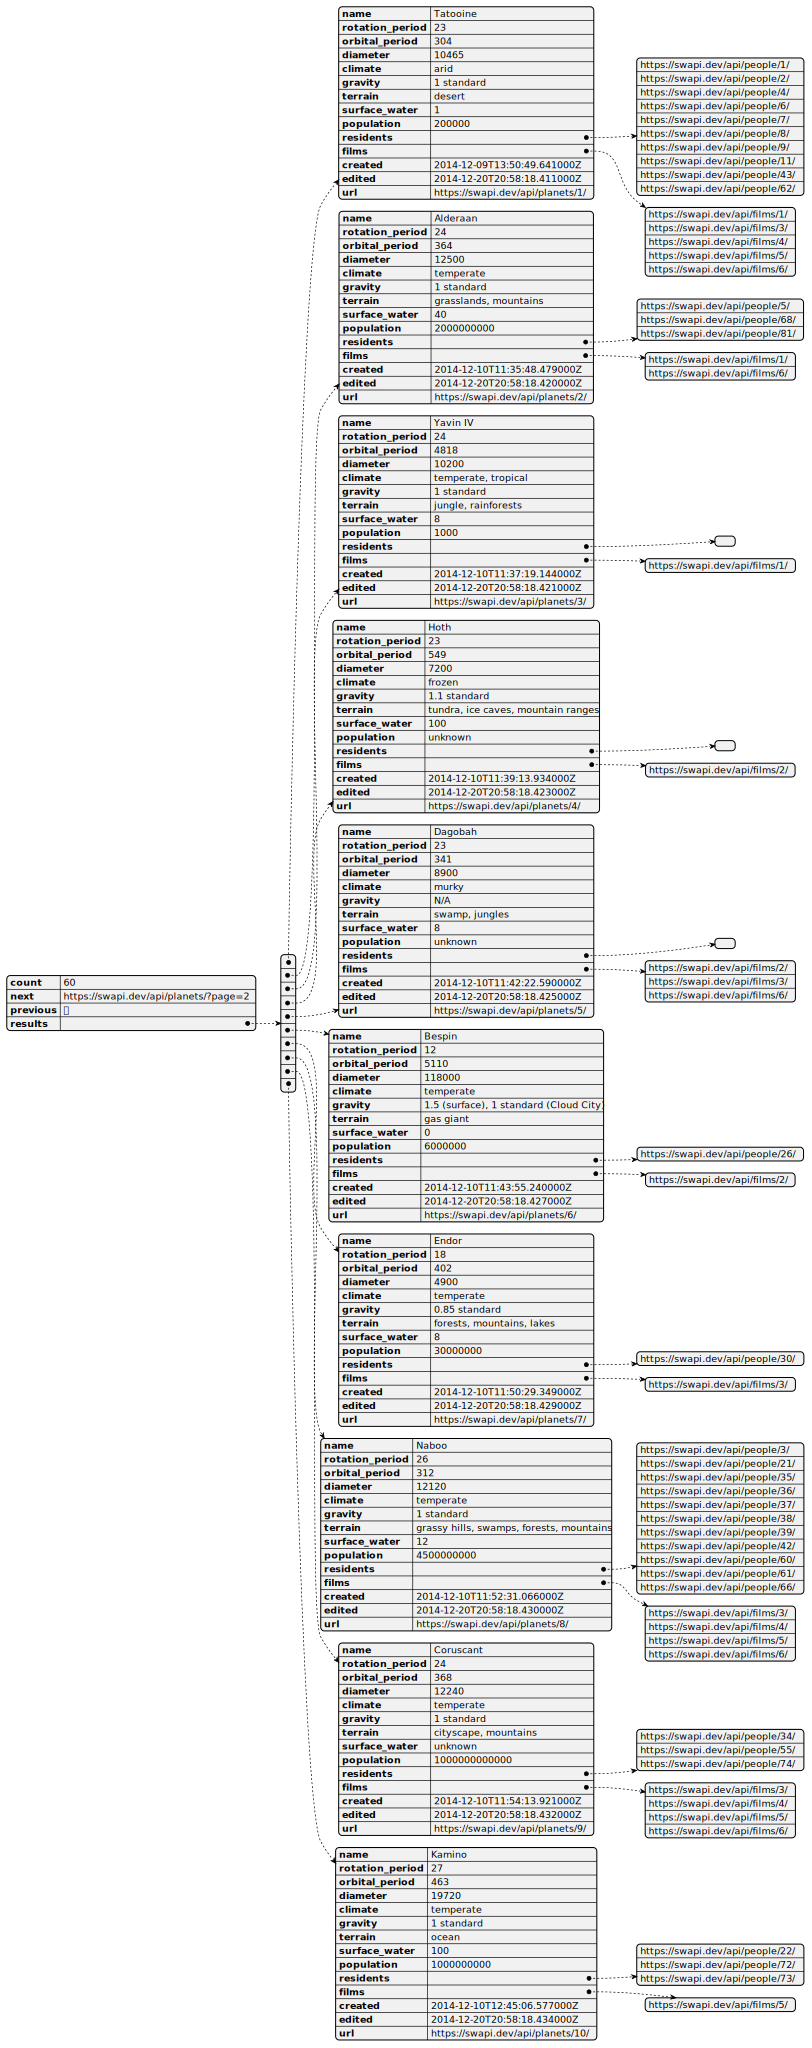

In [ ]:
%json --json=planets.json

* Remarquez que le JSON renvoyé dans la réponse contient le nombre total des planètes (attribut `count`) et le point de terminaison pour la prochaine page (attribut `next`).
  - Par ex., `"next": "https://swapi.dev/api/planets/?page=5"`
  - La valeur de l'attribut `next` de la dernière "page" contient `null`.
* À l'aide de `async`/`await` et des exemples fournis dans ce cahier, vous devez implémenter du code pour récupérer des informations et afficher les noms de toutes les planètes de la série.

<!--
async function fetchPlanets() {
  let page = 1;
  let json = await fetchJSON(baseUrl);
  printResults(json);
  while (json.next != null) {
    let url = `${baseUrl}?page=${++page}`;
    json = await fetchJSON(url);
    printResults(json);
  }
}


async function fetchPlanets() {
  let page = 0;
  let json = undefined;
  do {
    let url = `${baseUrl}?page=${++page}`;
    json = await fetchJSON(url);
    console.log(JSON.stringify(json.results));
  } while (json?.next != null);
}

-->

In [ ]:
%%javascript

const baseUrl = 'https://swapi.dev/api/planets';

async function fetchJSON(url) {
  const response = await fetch(url);
    if(!response.ok) {
      throw new Error(`Erreur HTTP : ${response.status}`);
    }
  return json = await response.json();
}

async function fetchPlanets() {
  // Completez le code...
  let page = 0;
  let json = undefined;
  do {
    let url = `${baseUrl}?page=${++page}`;
    json = await fetchJSON(url);
    console.log(JSON.stringify(json.results));
  } while (json?.next != null);
}

fetchPlanets();

<classroom_extensions.web.JavascriptWithConsole object>

# Références
------

* [MDN Web Docs - Utiliser Fetch](https://developer.mozilla.org/fr/docs/Web/API/Fetch_API/Using_Fetch)
* [MDN Web Docs - XMLHttpRequest](https://developer.mozilla.org/fr/docs/Web/API/XMLHttpRequest)
* [MDN - Gérer les opérations asynchrones avec élégance grâce aux promesses](https://developer.mozilla.org/fr/docs/Learn/JavaScript/Asynchronous/Promises)
* Marijn Haverbeke, Eloquent JavaScript, 3rd edition, 2018.
* [MDN- Utiliser Fetch](https://developer.mozilla.org/fr/docs/Web/API/Fetch_API/Using_Fetch)
* [MDN - Faciliter la programmation asynchrone avec async et await](https://developer.mozilla.org/fr/docs/Learn/JavaScript/Asynchronous/Async_await)
* [http://kangax.github.io/compat-table/es2016plus/](http://kangax.github.io/compat-table/es2016plus/)
* [ECMAScript - Wikipedia](https://en.wikipedia.org/wiki/ECMAScript)
* [Babel JavaScript compiler](https://babeljs.io/)
* [Faker API](https://fakerapi.it/en)
* [The Nobel Prize - Developer zone](https://www.nobelprize.org/about/developer-zone-2/)
* [SWAPI - The Star Wars API](https://swapi.dev/documentation#base)